<a href="https://colab.research.google.com/github/varunchandra10/Datamining_theory_algo_implementation/blob/main/Classification/KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Without Libraries

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
df = pd.read_csv("/content/sample_data/telecust.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [28]:
df.isnull().sum()

,0
region,0
tenure,0
age,0
marital,0
address,0
income,0
ed,0
employ,0
retire,0
gender,0


In [29]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000



Distribution of customer categories (custcat):
custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64


<ipython-input-30-37a4c7f25a3b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='custcat', data=df, palette='viridis')


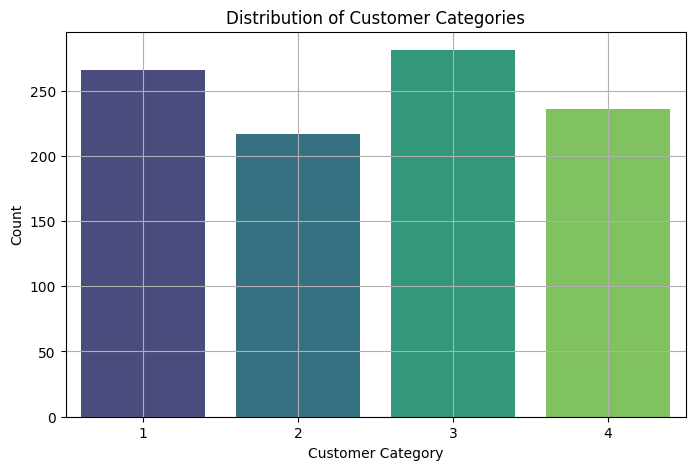

In [30]:
print("\nDistribution of customer categories (custcat):")
print(df['custcat'].value_counts())

# Plot the distribution of custcat
plt.figure(figsize=(8, 5))
sns.countplot(x='custcat', data=df, palette='viridis')
plt.title("Distribution of Customer Categories")
plt.xlabel("Customer Category")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [31]:
def get_distance(point1, point2, is_numerical=True):
    if is_numerical:
        # Euclidean distance: measures straight-line distance
        differences = point1 - point2
        squared_diffs = differences ** 2
        sum_diffs = np.sum(squared_diffs)
        return np.sqrt(sum_diffs)
    else:
        # Hamming distance: counts differences
        return np.sum(point1 != point2)

In [39]:
def manhattan_distance(point1, point2):
    # City-block distance (like walking along streets)
    differences = np.abs(point1 - point2)
    return np.sum(differences)

In [40]:
def minkowski_distance(point1, point2, p=3):
    # General distance (mix of Euclidean and Manhattan, p=3 here)
    differences = np.abs(point1 - point2) ** p
    sum_diffs = np.sum(differences)
    return sum_diffs ** (1/p)

In [41]:
# Find k closest points and guess the category
def knn_guess(training_data, training_labels, test_point, k=3, distance_metric='euclidean'):
    distances = []
    for i in range(len(training_data)):
        if distance_metric == 'euclidean':
            dist = euclidean_distance(test_point, training_data[i])
        elif distance_metric == 'manhattan':
            dist = manhattan_distance(test_point, training_data[i])
        elif distance_metric == 'minkowski':
            dist = minkowski_distance(test_point, training_data[i], p=3)
        distances.append((dist, training_labels[i], i))

    distances.sort()
    k_closest = distances[:k]
    k_labels = [label for _, label, _ in k_closest]

    label_counts = {}
    for label in k_labels:
        label_counts[label] = label_counts.get(label, 0) + 1
    most_common = max(label_counts, key=label_counts.get)

    neighbor_ids = [idx for _, _, idx in k_closest]
    return most_common, neighbor_ids

In [42]:
# Plot all data with category-specific colors
def show_data_plot(data, labels, title="Data Plot"):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)

    plt.figure(figsize=(8, 5))
    unique_labels = np.unique(labels)
    cmap = plt.get_cmap('viridis')
    colors = [cmap(i / len(unique_labels)) for i in range(len(unique_labels))]
    color_map = dict(zip(sorted(unique_labels), colors))

    for label in sorted(unique_labels):
        mask = labels == label
        plt.scatter(
            data_2d[mask, 0],
            data_2d[mask, 1],
            color=color_map[label],
            label=f'Category {label}',
            alpha=0.6
        )

    plt.title(title)
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.legend()
    plt.grid(True)
    plt.show()

    return pca, data_2d, color_map

In [46]:
# Plot test point and neighbors with consistent colors
def show_guess_plot(data_2d, labels, test_point_2d, neighbor_ids, guessed_label, color_map, distance_metric):
    plt.figure(figsize=(8, 5))
    unique_labels = np.unique(labels)

    for label in sorted(unique_labels):
        mask = labels == label
        plt.scatter(
            data_2d[mask, 0],
            data_2d[mask, 1],
            color=color_map[label],
            alpha=0.3,
            label=f'Category {label}' if label == unique_labels[0] else None
        )

    plt.scatter(test_point_2d[0], test_point_2d[1], color='red', marker='*', s=200, label="Test Point")
    plt.scatter(data_2d[neighbor_ids, 0], data_2d[neighbor_ids, 1],
                color='blue', edgecolor='black', s=100, label="Nearest Neighbors")

    plt.title(f"({distance_metric.capitalize()} Distance)")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.legend()
    plt.grid(True)
    plt.show()

In [44]:
def run_knn(filepath, label_column, k, test_point):
    # Load and preprocess data
    data = pd.read_csv(filepath)
    X = data.drop(columns=[label_column]).values
    y = data[label_column].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    test_point = np.array(test_point).reshape(1, -1)
    test_point = scaler.transform(test_point)[0]

    # Show training data (one plot)
    pca, X_2d, color_map = show_data_plot(X, y, title="All Data Before Guessing")

    # Test with three distance metrics
    distance_metrics = ['euclidean', 'manhattan', 'minkowski']
    predictions = {}

    for metric in distance_metrics:
        guess, neighbor_ids = knn_guess(X, y, test_point, k=k, distance_metric=metric)
        predictions[metric] = (guess, neighbor_ids)
        test_point_2d = pca.transform([test_point])[0]
        show_guess_plot(X_2d, y, test_point_2d, neighbor_ids, guess, color_map, metric)

    return predictions

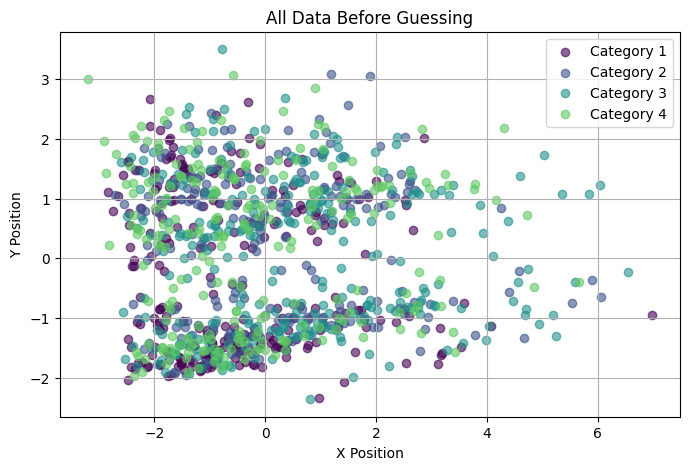

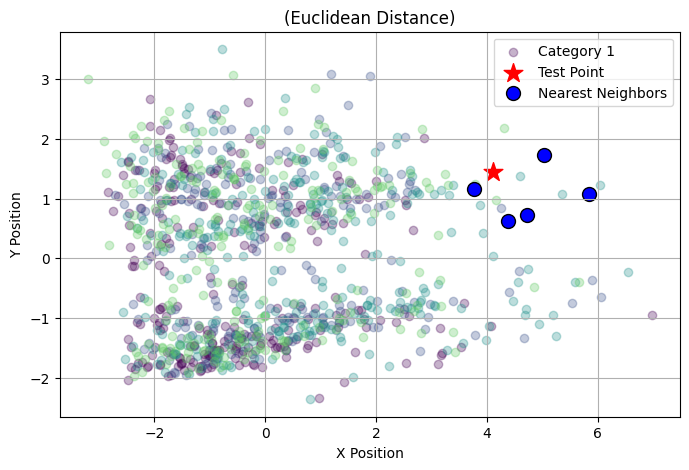

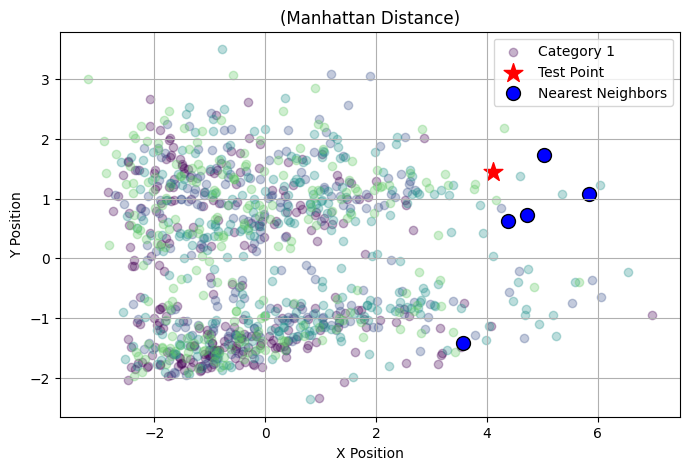

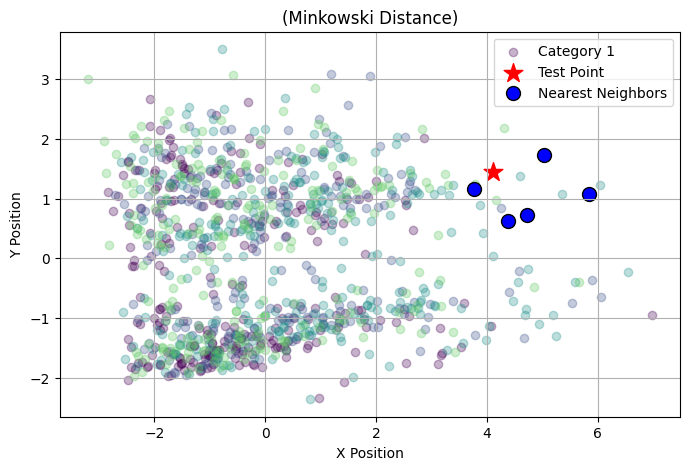


Predictions for each distance metric:
Euclidean Distance: Category 3
Manhattan Distance: Category 3
Minkowski Distance: Category 3


In [47]:
try:
    predictions = run_knn(
        filepath="/content/sample_data/telecust.csv",
        label_column="custcat",
        k=5,
        test_point=[3, 59, 60, 1, 40, 100, 3, 27, 1, 1, 4]
    )
    print("\nPredictions for each distance metric:")
    for metric, (guess, _) in predictions.items():
        print(f"{metric.capitalize()} Distance: Category {guess}")
except FileNotFoundError:
    print("Error: Could not find the file 'telecust.csv'. Please check the file path.")
except Exception as e:
    print(f"Something went wrong: {e}")

# Using Libraries

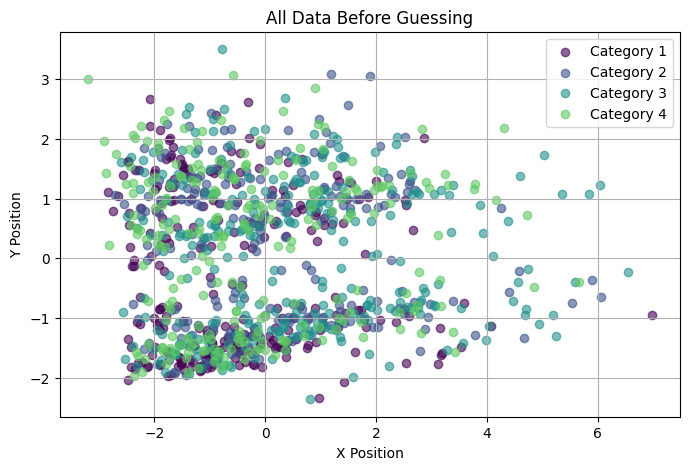

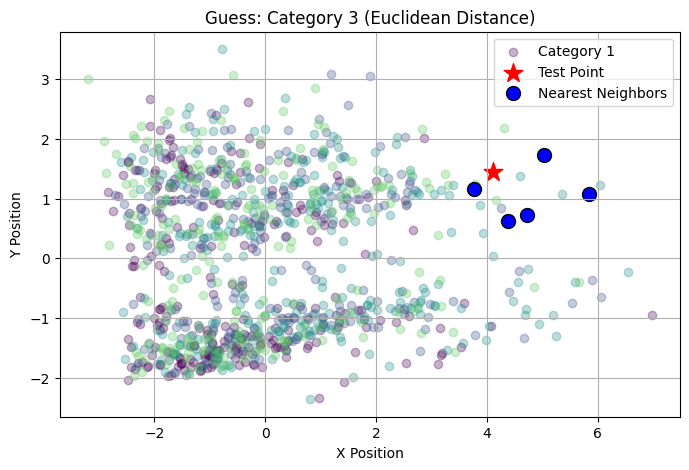

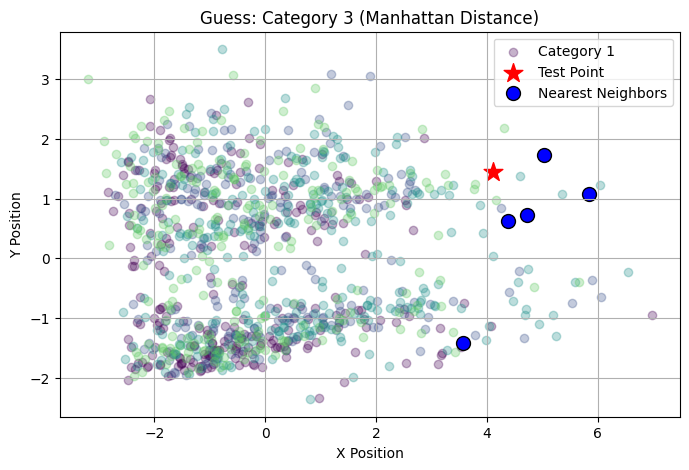

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_unsupervised.py:179: SyntaxWarning: Parameter p is found in metric_params. The corresponding parameter from __init__ is ignored.
  return self._fit(X)


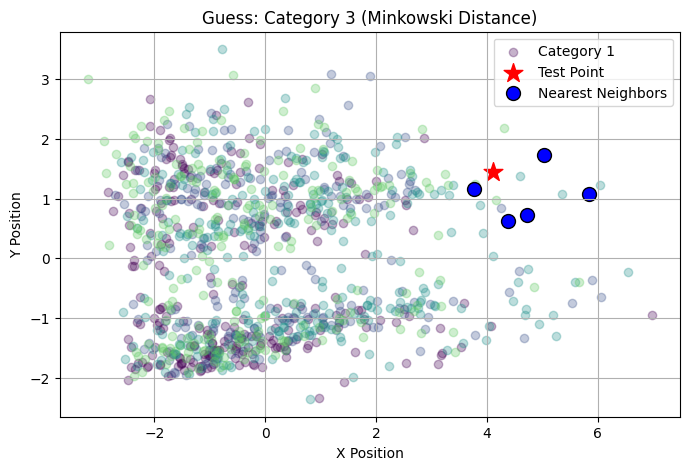


Predictions for each distance metric:
Euclidean Distance: Category 3
Manhattan Distance: Category 3
Minkowski Distance: Category 3


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

# Plot training data
def show_data_plot(data, labels, title="Data Plot"):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)

    plt.figure(figsize=(8, 5))
    unique_labels = np.unique(labels)
    cmap = plt.get_cmap('viridis')
    colors = [cmap(i / len(unique_labels)) for i in range(len(unique_labels))]
    color_map = dict(zip(sorted(unique_labels), colors))

    for label in sorted(unique_labels):
        mask = labels == label
        plt.scatter(
            data_2d[mask, 0],
            data_2d[mask, 1],
            color=color_map[label],
            label=f'Category {label}',
            alpha=0.6
        )

    plt.title(title)
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.legend()
    plt.grid(True)
    plt.show()

    return pca, data_2d, color_map

# Plot prediction with test point and neighbors
def show_guess_plot(data_2d, labels, test_point_2d, neighbor_ids, guessed_label, color_map, distance_metric):
    plt.figure(figsize=(8, 5))
    unique_labels = np.unique(labels)

    for label in sorted(unique_labels):
        mask = labels == label
        plt.scatter(
            data_2d[mask, 0],
            data_2d[mask, 1],
            color=color_map[label],
            alpha=0.3,
            label=f'Category {label}' if label == unique_labels[0] else None
        )

    plt.scatter(test_point_2d[0], test_point_2d[1], color='red', marker='*', s=200, label="Test Point")
    plt.scatter(data_2d[neighbor_ids, 0], data_2d[neighbor_ids, 1],
                color='blue', edgecolor='black', s=100, label="Nearest Neighbors")

    plt.title(f"Guess: Category {guessed_label} ({distance_metric.capitalize()} Distance)")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.legend()
    plt.grid(True)
    plt.show()

def run_knn(filepath, label_column, k, test_point):
    # Load and preprocess data
    data = pd.read_csv(filepath)
    X = data.drop(columns=[label_column]).values
    y = data[label_column].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    test_point = np.array(test_point).reshape(1, -1)
    test_point_scaled = scaler.transform(test_point)

    # Show training data (one plot)
    pca, X_2d, color_map = show_data_plot(X, y, title="All Data Before Guessing")
    test_point_2d = pca.transform(test_point_scaled)[0]

    # Define distance metrics
    distance_metrics = [
        ('euclidean', 'euclidean'),
        ('manhattan', 'manhattan'),
        ('minkowski', {'metric': 'minkowski', 'p': 3})
    ]
    predictions = {}

    for metric_name, metric_param in distance_metrics:
        # Train kNN classifier
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric_param if isinstance(metric_param, str) else 'minkowski',
                                  metric_params=None if isinstance(metric_param, str) else {'p': 3})
        knn.fit(X, y)

        # Predict category
        guess = knn.predict(test_point_scaled)[0]

        # Find k nearest neighbors
        nn = NearestNeighbors(n_neighbors=k, metric=metric_param if isinstance(metric_param, str) else 'minkowski',
                             metric_params=None if isinstance(metric_param, str) else {'p': 3})
        nn.fit(X)
        _, neighbor_ids = nn.kneighbors(test_point_scaled)
        neighbor_ids = neighbor_ids[0]  # Get indices as 1D array

        # Store prediction
        predictions[metric_name] = (guess, neighbor_ids)

        # Plot prediction
        show_guess_plot(X_2d, y, test_point_2d, neighbor_ids, guess, color_map, metric_name)

    return predictions

try:
    predictions = run_knn(
        filepath="/content/sample_data/telecust.csv",
        label_column="custcat",
        k=5,
        test_point=[3, 59, 60, 1, 40, 100, 3, 27, 1, 1, 4]
    )
    print("\nPredictions for each distance metric:")
    for metric, (guess, _) in predictions.items():
        print(f"{metric.capitalize()} Distance: Category {guess}")
except FileNotFoundError:
    print("Error: Could not find the file 'telecust.csv'. Please check the file path.")
except Exception as e:
    print(f"Something went wrong: {e}")